<a href="https://colab.research.google.com/github/julianna-778/bme3053c/blob/main/homework/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#install scipy
!pip install scipy

In [9]:
#HOMEWORK 7
#Julianna Gonzalez

#import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.signal import find_peaks

In [11]:
#making artificial ECG data
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse


    # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)


    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)


    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise


    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander


    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference


    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]


    return ecg_data


ecg_data = generate_ecg_data(10, 250)
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse

    # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)

    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)

    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise

    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander

    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference

    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]

    return ecg_data

ecg_data = generate_ecg_data(10, 250)

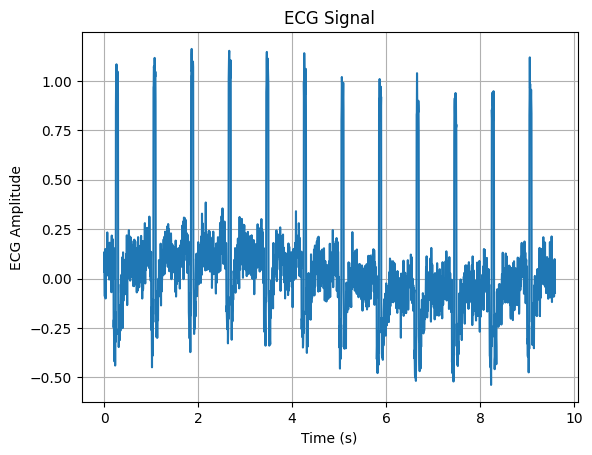

In [12]:
#PART 1: VISUALIZING ECG SIGNAL
time = np.arange(len(ecg_data)) / 250

#plot figure 1
plt.plot(time, ecg_data)
plt.xlabel('Time (s)')
plt.ylabel('ECG Amplitude')
plt.title('ECG Signal')
plt.grid()

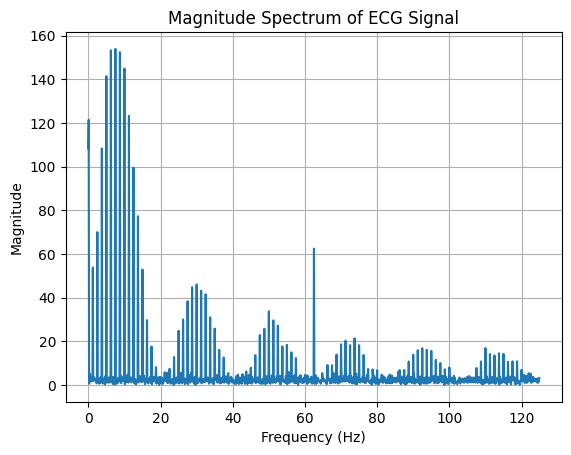

In [13]:
#PART 2: FOURIER TRANSFORM
ft = fft(ecg_data)
mag_ft = np.abs(ft)

# Cursor: Calculate frequency axis (only positive frequencies)
freq = np.fft.fftfreq(len(ecg_data), 1/250)[:len(ecg_data)//2]

# Cursor: Plot the magnitude of the Fourier transform against the frequency, but show only the positive frequencies
plt.figure()
plt.plot(freq, mag_ft[:len(freq)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of ECG Signal')
plt.grid()

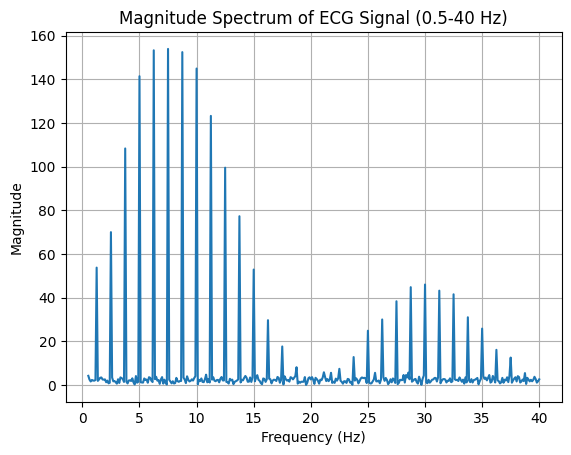

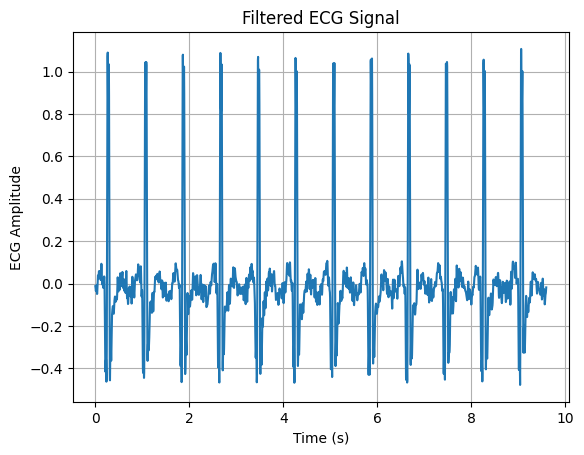

In [20]:
#PART 3: FILTERING ECG SIGNAL

# Plot magnitude spectrum of filtered signal (0.5-40 Hz)
plt.figure()
# Use mag_ft[:len(freq)] to get only positive frequencies
plt.plot(freq[(freq >= 0.5) & (freq <= 40)], 
         mag_ft[:len(freq)][(freq >= 0.5) & (freq <= 40)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude') 
plt.title('Magnitude Spectrum of ECG Signal (0.5-40 Hz)')
plt.grid()

freq_full = np.fft.fftfreq(len(ecg_data), 1/250)

# Create frequency mask for all frequencies
mask = np.zeros(len(ft))
mask[(np.abs(freq_full) >= 0.5) & (np.abs(freq_full) <= 40)] = 1

# Apply mask to Fourier transform
ft_filtered = ft * mask

# Reconstruct filtered signal using inverse FFT
ecg_filtered = np.real(ifft(ft_filtered))

# Plot filtered signal
plt.figure()
plt.plot(time, ecg_filtered)
plt.xlabel('Time (s)')
plt.ylabel('ECG Amplitude')
plt.title('Filtered ECG Signal')
plt.grid()


Average Heart Rate: 75.0


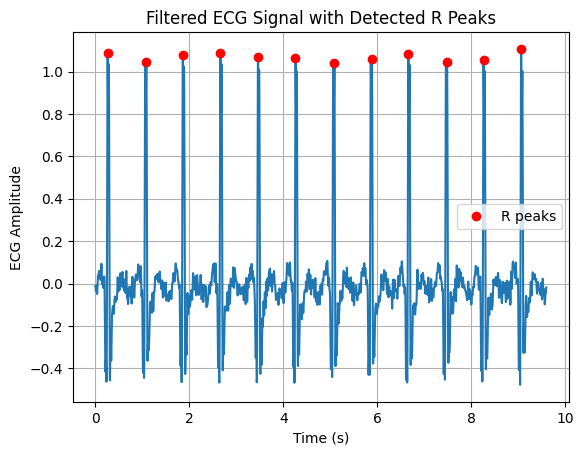

In [28]:
#PART 4: HEART WAVE CALCULATION
# Find R-peaks in filtered ECG signal using find_peaks
# The R peaks are the highest amplitude peaks in the ECG signal
r_peaks, _ = find_peaks(ecg_filtered, height=0.5*max(ecg_filtered), distance=50)

# Plot filtered signal with detected R-peaks
plt.figure()
plt.plot(time, ecg_filtered)
plt.plot(time[r_peaks], ecg_filtered[r_peaks], 'ro', label='R peaks')
plt.xlabel('Time (s)')
plt.ylabel('ECG Amplitude')
plt.title('Filtered ECG Signal with Detected R Peaks')
plt.legend()
plt.grid()

# Calculate time intervals between successive R-peaks (in seconds)
r_intervals = np.diff(time[r_peaks])
r_av_interval = np.mean(r_intervals)
# Calculate heart rate in BPM
# BPM = 60 seconds / R-R interval in seconds
heart_rates = 60 / r_av_interval

print('Average Heart Rate:', heart_rates)


PART 5: SUMMARIZE FINDINGS

During this lab, I was able to troubleshoot intalling SciPy. I first tried to use Cursor to troubleshoot the errors for me, but Cursor was unable to provide an effective solution. I then used old faithful Google to find examples of similar issues other people had and their solutions. 

Once SciPy was installed, I visualized the ECG signal in the time domain and applied the Fourier transform to observe the signal in the frequency domain with positive frequencies. Using conditionals, I filtered the signal within the normal physiological range and visualized the frequency domain graph. I then reconstructed the filtered signal using the inverse Fourier transform and visualized it in the time domain. Finally, by using find_peaks() from SciPy, I identified the R-peaks in the signal and calculated an average heart rate of 75 BPM.